# Esercitazione 12

In queta esercitazione mi confronterò con un task di classificazione. Come metrica utilizzeremo in maniera molto naturale l'accuracy. Riprendo brevemente gli specchietti forniti nel jupiter notebook della consegna, che riguardano la costruzione della rete DNN.

In [5]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=1
np.random.seed(seed) # fix random seed
tf.random.set_random_seed(seed) #MODIFICATO

In [6]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


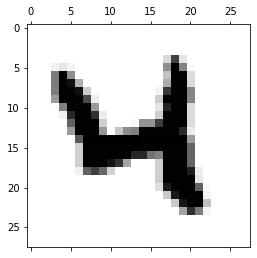

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [7]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [8]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [10]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [11]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.7713 - acc: 0.7730 - val_loss: 0.3152 - val_acc: 0.9138
Epoch 2/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.3845 - acc: 0.8908 - val_loss: 0.2401 - val_acc: 0.9324
Epoch 3/5
60000/60000 [==============================] - 11s 190us/step - loss: 0.3111 - acc: 0.9110 - val_loss: 0.2047 - val_acc: 0.9389
Epoch 4/5
60000/60000 [==============================] - 12s 192us/step - loss: 0.2662 - acc: 0.9245 - val_loss: 0.1781 - val_acc: 0.9455
Epoch 5/5
60000/60000 [==============================] - 10s 172us/step - loss: 0.2353 - acc: 0.9334 - val_loss: 0.1575 - val_acc: 0.9516


10000/10000 [==============================] - 1s 55us/step

Test loss: 0.15746986141577363
Test accuracy: 0.9516000151634216


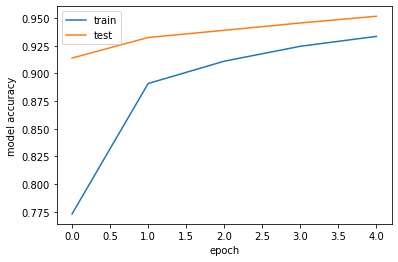

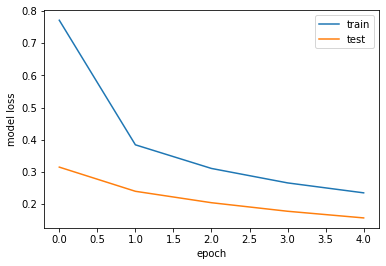

In [12]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Esercizio 12.1

Ho completato l'esercizio provando ad usare degli ottimizzatori diversi dallo SGD. Per iniziare userò gli stessi due ottimizzatori che avevo provato nell'esercitazione 11: Adagrad e Adadelta.

### Adagrad

In [13]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [14]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 209us/step - loss: 0.2799 - acc: 0.9183 - val_loss: 0.1270 - val_acc: 0.9615
Epoch 2/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.1422 - acc: 0.9598 - val_loss: 0.0986 - val_acc: 0.9700
Epoch 3/5
60000/60000 [==============================] - 13s 210us/step - loss: 0.1085 - acc: 0.9696 - val_loss: 0.0856 - val_acc: 0.9742
Epoch 4/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.0897 - acc: 0.9748 - val_loss: 0.0783 - val_acc: 0.9755
Epoch 5/5
60000/60000 [==============================] - 13s 217us/step - loss: 0.0754 - acc: 0.9784 - val_loss: 0.0746 - val_acc: 0.9776


10000/10000 [==============================] - 1s 57us/step

Test loss: 0.07461483202127274
Test accuracy: 0.9775999784469604


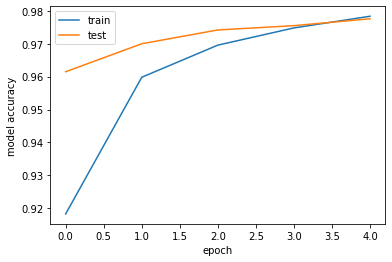

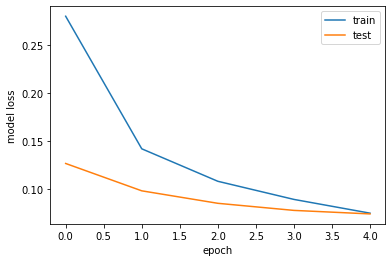

In [15]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Adadelta

In [16]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [17]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 219us/step - loss: 0.2853 - acc: 0.9172 - val_loss: 0.1244 - val_acc: 0.9617
Epoch 2/5
60000/60000 [==============================] - 13s 216us/step - loss: 0.1440 - acc: 0.9597 - val_loss: 0.1000 - val_acc: 0.9707
Epoch 3/5
60000/60000 [==============================] - 13s 225us/step - loss: 0.1106 - acc: 0.9688 - val_loss: 0.0874 - val_acc: 0.9720
Epoch 4/5
60000/60000 [==============================] - 14s 231us/step - loss: 0.0931 - acc: 0.9740 - val_loss: 0.0786 - val_acc: 0.9767
Epoch 5/5
60000/60000 [==============================] - 14s 228us/step - loss: 0.0810 - acc: 0.9774 - val_loss: 0.0734 - val_acc: 0.9773


10000/10000 [==============================] - 1s 58us/step

Test loss: 0.07343256170330568
Test accuracy: 0.9772999882698059


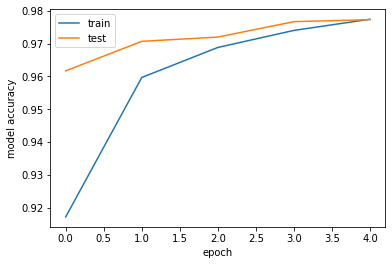

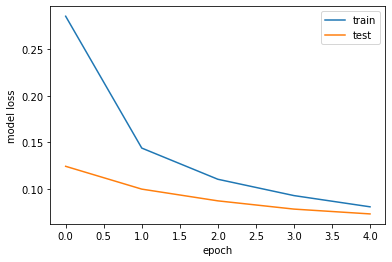

In [18]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Osserviamo come Adagrad e Adadelta portano a risultati molto simili tra loro, e migliori rispetto a SGD (la loss scende di più, l'accuracy è migliore). Possiamo dire che in questo problema ci troviamo nella situazione opposta a quella dell'esercitazione 11: ora i due ottimizzatori provati Adagrad e Adadelta funzionano meglio di SGD.

### Adam

Provo anche l'ottimizzatore Adam, che dovrebbe permettere un dispendio di spazio di memoria poco superiore a SGD, per vedere se permette di ottenere risultati migliori rispetto a quest'ultimo.

In [19]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [20]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 269us/step - loss: 0.2791 - acc: 0.9177 - val_loss: 0.1132 - val_acc: 0.9636
Epoch 2/5
60000/60000 [==============================] - 16s 265us/step - loss: 0.1209 - acc: 0.9651 - val_loss: 0.0863 - val_acc: 0.9730
Epoch 3/5
60000/60000 [==============================] - 16s 266us/step - loss: 0.0865 - acc: 0.9746 - val_loss: 0.0783 - val_acc: 0.9766
Epoch 4/5
60000/60000 [==============================] - 16s 265us/step - loss: 0.0690 - acc: 0.9797 - val_loss: 0.0769 - val_acc: 0.9787
Epoch 5/5
60000/60000 [==============================] - 16s 264us/step - loss: 0.0583 - acc: 0.9827 - val_loss: 0.0888 - val_acc: 0.9745


10000/10000 [==============================] - 1s 59us/step

Test loss: 0.08882018948339755
Test accuracy: 0.9745000004768372


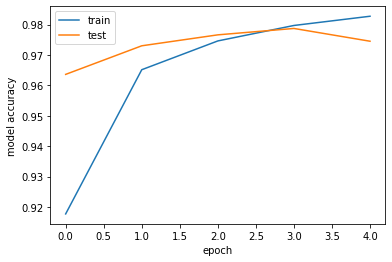

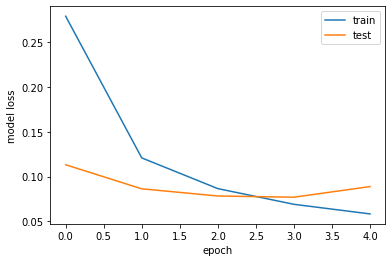

In [21]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Effettivamente i risultati ottenuti sono migliori rispetto a SGD. Notiamo inoltre che la loss sui dati di test inizia ad aumentare dopo la terza epoca, sintomo probabile di overfitting.

## Esercizio 12.2

In questo esercizio proverò a migliorare le prestazioni della rete aggiungendo alcuni layer convoluzionali.

In [22]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [23]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128, activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(Dense(10,activation=tf.nn.softmax))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [24]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 283s 5ms/step - loss: 0.4904 - acc: 0.8356 - val_loss: 0.0763 - val_acc: 0.9753
Epoch 2/5
60000/60000 [==============================] - 290s 5ms/step - loss: 0.1195 - acc: 0.9637 - val_loss: 0.0488 - val_acc: 0.9847
Epoch 3/5
60000/60000 [==============================] - 305s 5ms/step - loss: 0.0875 - acc: 0.9725 - val_loss: 0.0379 - val_acc: 0.9881
Epoch 4/5
60000/60000 [==============================] - 313s 5ms/step - loss: 0.0734 - acc: 0.9777 - val_loss: 0.0332 - val_acc: 0.9889
Epoch 5/5
10000/10000 [==============================] - 10s 987us/step

Test loss: 0.031506322145543525
Test accuracy: 0.9896000027656555


# Esercizio 12.3

Image size: 28x28


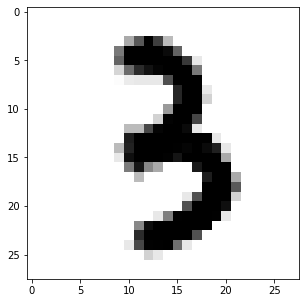

(28, 28)


In [37]:
from PIL import Image
import os

digit_filename = "./3d.png"
digit_in = Image.open(digit_filename).convert('L')
#digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

(28, 28)
(1, 784)


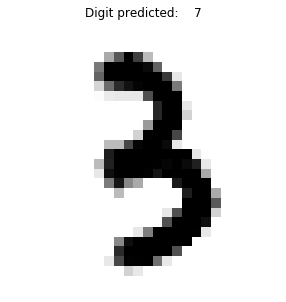

In [38]:
print(data.shape)
data = data.reshape(1,xdim*ydim)
print(data.shape)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()

Ho provato a modificare il numero e la tipologia di layer, ma sembra che le prestazioni non migliorino. La rete non sembra funzionare particolarmente bene: di tutte le prove che ho fatto ho ottenuto un'accuracy di circa il 10%.